In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
exp_folder = '../results/'
accuracy_string = 'accuracy'

In [4]:
all_csv = os.listdir(exp_folder)
df = None
for c_file in all_csv:
    if accuracy_string in c_file:
        _df = pd.read_csv(os.path.join(exp_folder, c_file))
        if df is None: df = _df
        else: df = df.append(_df)
df['accuracy'] = df['correct']/df['total']
            
df = df.drop(['trips', 'total', 'correct'], axis=1)
df_grouped = df.groupby(['region_size', 'steps'], as_index=False)
df = df_grouped.mean()
df.columns

Index(['region_size', 'steps', 'accuracy'], dtype='object')

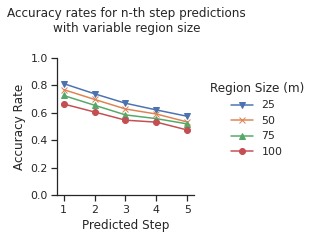

In [18]:
data = df
data['spec'] = 0
sns.set(style="ticks")
g = sns.FacetGrid(data, 
                  hue='region_size', col='spec',
                  hue_kws=dict(marker=["v", "x", "^", "o"]))
g = (g.map(
    plt.plot, 
    'steps', 
    'accuracy').add_legend(bbox_to_anchor=(0.75, 0.8), loc='upper left')
    ).set_titles('')#"Accuracy rates for present\n location predictions", y=1.1)
g.set(ylim=(0.0, 1))
g.set(xticks=range(1,6))
g._legend.set_title('Region Size (m)')
g.set(xlabel='Predicted Step', ylabel='Accuracy Rate')
g.fig.suptitle('Accuracy rates for n-th step predictions\nwith variable region size', fontsize=12, y=1.1)
g.savefig('./n_th_step.svg', format='svg')


In [7]:
sns.lineplot(x='steps', y='accuracy', hue='region_size', 
             data=df)

seaborn.axisgrid.FacetGrid